# $$Pandas 2022$$
$Grupo$ $7:$

- Aguirre Gabriel - 44899
- Agostinelli Gino - 46795

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
plt.style.use('seaborn')

# Acción a Analizar

In [2]:
ticker = 'YPF'

In [3]:
# Fechas
today = datetime.datetime.today() # Fecha de hoy
start = datetime.date(today.year-12,1,1) # Fecha - 12 años

tk = yf.Ticker(ticker)
stockinfo = tk.info

# Principales Datos de la Empresa

In [4]:
nombre = stockinfo['longName']
pais = stockinfo.get('country', 'Sin Datos')
ciudad = stockinfo.get('city', 'Sin Datos')
industria = stockinfo.get('industry', 'Sin Datos')
empleados = stockinfo.get('fullTimeEmployees', 'Sin Datos')
negocio = stockinfo.get('longBusinessSummary', 'Sin Datos')

print(ticker)
print('---------------------')
print(f'PAÍS: {pais}')
print(f'CIUDAD: {ciudad}')
print(f'INDUSTRIA: {industria}')
print(f'CANTIDAD DE EMPLEADOS: {empleados}')
print('----')
print('RESUMEN DEL NEGOCIO:')
print(negocio)


# Transformarlo en un DataFrame

indice = ['Nombre', 'País', 'Ciudad', 'Industria', 'Cantidad De Empleados']
datos = [nombre, pais, ciudad, industria, empleados]

datosEmpresa = pd.DataFrame()

datosEmpresa['Propiedades'] = indice
datosEmpresa['Datos'] = datos

YPF
---------------------
PAÍS: Argentina
CIUDAD: Buenos Aires
INDUSTRIA: Oil & Gas Integrated
CANTIDAD DE EMPLEADOS: Sin Datos
----
RESUMEN DEL NEGOCIO:
YPF Sociedad Anónima, an energy company, engages in the oil and gas upstream and downstream activities in Argentina. The company's upstream operations include the exploration, development, and production of crude oil, natural gas, and NGLs. Its downstream operations include the refining, marketing, transportation, and distribution of oil, petroleum products, petroleum derivatives, petrochemicals, LPG, and bio-fuels, as well as in gas separation, natural gas distribution operations, and power generation. As of December 31, 2021, it had interests in 119 oil and gas fields; approximately 643 million barrels (mmbbl) of oil; and approximately 2,447 billion cubic feet (bcf) of gas. It also had a retail distribution network of 1,654 YPF-branded service stations; and 18 exploration permits. In addition, the company owns and operates three ref

# Grafico de la Acción

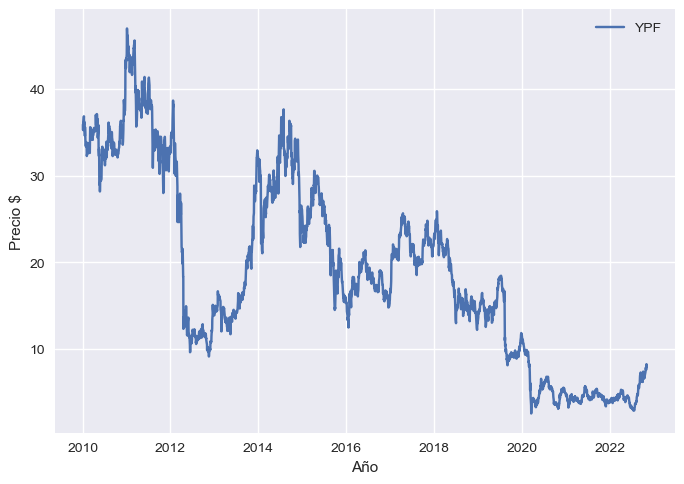

In [5]:
grafico = tk.history(start=start, end=today)

plt.figure()
plt.plot(grafico['Close'])
plt.ylabel('Precio $')
plt.xlabel('Año')
plt.legend([ticker])
plt.show()

# Dividendos

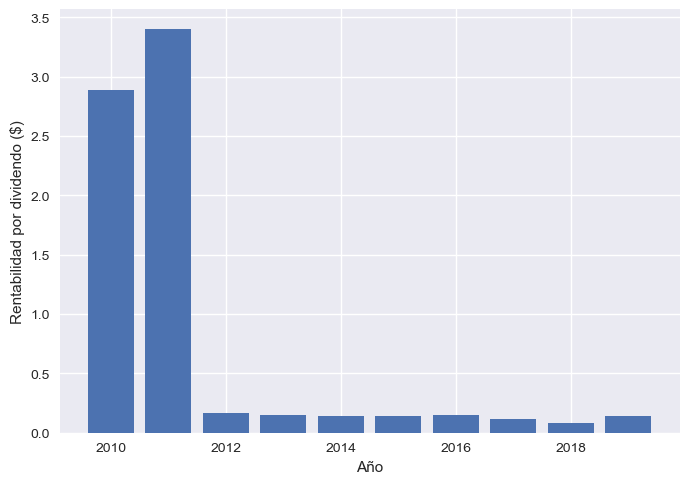

In [6]:
dividendos = tk.dividends
div = dividendos.resample('Y').sum() # Cantidad acumulada de dividendos en el año
div = div.reset_index() # Para poder crear nuevas columnas

div['Year'] = div['Date'].dt.year # Crea una nueva columna


plt.figure()
plt.bar(div['Year'], div['Dividends'])
plt.ylabel('Rentabilidad por dividendo ($)')
plt.xlabel('Año')
plt.show()


del(div["Date"])

# Splits de la Acción

In [7]:
splits = tk.splits

splt = splits.to_frame() # Tranformarlo en un DatFrame

splt.index = splt.index.strftime('%d-%m-%Y') # Cambiar el formato de la fecha

splt

,Stock Splits
Date,


# Principales Accionistas (Holders)

In [8]:
accionistas = tk.institutional_holders
accionistas

,Holder,Shares,Date Reported,% Out,Value
0,Marshall Wace LLP,3072748,2022-06-29,0.0078,24366891
1,Morgan Stanley,2582750,2022-06-29,0.0066,20481207
2,Blackrock Inc.,2165857,2022-06-29,0.0055,17175245
3,"Wellington Management Group, LLP",1910479,2022-06-29,0.0049,15150098
4,"Arrowstreet Capital, Limited Partnership",1611885,2022-06-29,0.0041,12782247
5,Millennium Management Llc,1575851,2022-06-29,0.0040,12496498
6,"Discovery Capital Management, LLC",1425018,2022-06-29,0.0036,11300392
7,Connor Clark & Lunn Investment Management Ltd,1393236,2022-06-29,0.0035,11048361
8,"Two Sigma Investments, LP",1232000,2022-06-29,0.0031,9769759
9,Man Group PLC,1191420,2022-06-29,0.0030,9447960


# Recomendaciones

In [9]:
recomendaciones = tk.recommendations

recomendaciones

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 07:46:00,Goldman Sachs,Sell,,main
2012-04-17 06:49:00,Bank oferica,Underperform,,down
2012-08-10 07:45:00,Tudor Pickering,Sell,Hold,down
2013-10-24 08:24:53,Goldman Sachs,Neutral,Sell,up
2014-01-06 06:52:25,Morgan Stanley,Overweight,,init
2014-01-06 16:00:00,Raymond James,Outperform,Market Perform,up
2014-07-11 07:32:44,JP Morgan,Neutral,,init
2014-11-13 09:00:00,JP Morgan,Neutral,,main
2014-12-09 00:00:00,Deutsche Bank,Hold,Buy,down


# Comparación con otras empresas

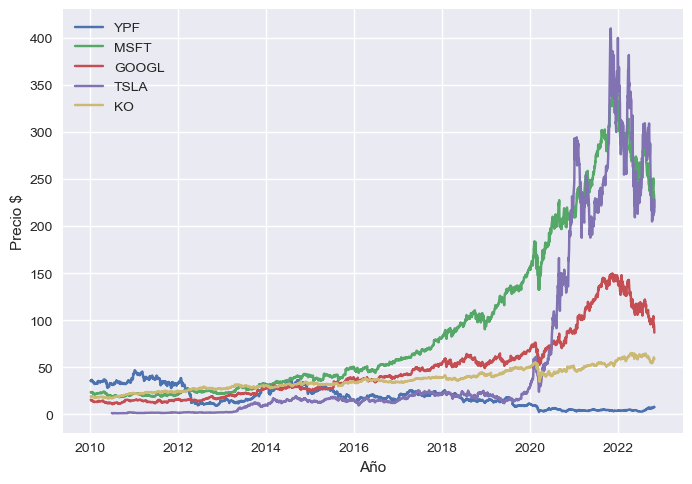

In [10]:
empresas = ['MSFT', 'GOOGL', 'TSLA', 'KO']
empresas.insert(0, ticker)

df = pd.DataFrame()

for empresa in empresas: 
    df[empresa] = yf.Ticker(empresa).history(start=start, end=today).Close # Carga las empresas que esten en la lista
    
plt.figure()
plt.plot(df)
plt.ylabel('Precio $')
plt.xlabel('Año')
plt.legend(empresas)
plt.show()

# Guardar los Datos de la empresa en Excel

In [11]:
with pd.ExcelWriter(ticker + '.xlsx',
                        engine='xlsxwriter'
                        ,datetime_format='dd-mmm-yyyy') as writer:
    datosEmpresa.to_excel(writer, sheet_name='Datos Empresa', index=False)
    div.to_excel(writer, sheet_name='Dividendos', index=False)
    splt.to_excel(writer, sheet_name='Splits')
    accionistas.to_excel(writer, sheet_name='Principales Accionistas')
    if recomendaciones is not None:
        recomendaciones.to_excel(writer, sheet_name='Recomendaciones')